# Image Idenfication using artificial neural networks

In [ ]:
%matplotlib inline

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sklearn
import sys
import tensorflow as tf
from tensorflow import keras
import time

In [ ]:
print("python", sys.version)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

python 3.7.10 (default, Feb 20 2021, 21:17:23) 
[GCC 7.5.0]
matplotlib 3.2.2
numpy 1.19.5
pandas 1.1.5
sklearn 0.22.2.post1
tensorflow 2.4.1
tensorflow.keras 2.4.0


In [ ]:
assert sys.version_info >= (3, 5) # Python ≥3.5 required
assert tf.__version__ >= "2.0"    # TensorFlow ≥2.0 required

## Part 1- Baseline Model

In [ ]:
classes = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.cifar10.load_data()
X_train = X_train_full[:-5000] / 255
y_train = y_train_full[:-5000]
X_valid = X_train_full[-5000:] / 255
y_valid = y_train_full[-5000:]
X_test = X_test / 255

170500096/170498071 [==============================] - 3s 0us/step


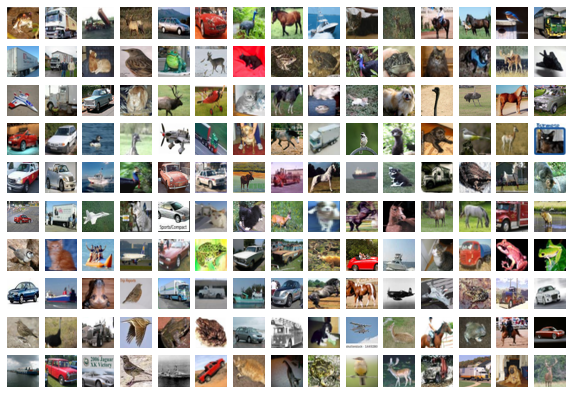

In [ ]:
plt.figure(figsize=(10, 7))
n_rows, n_cols = 10, 15
for row in range(n_rows):
    for col in range(n_cols):
        i = row * n_cols + col
        plt.subplot(n_rows, n_cols, i + 1)
        plt.axis("off")
        plt.imshow(X_train[i])

In [ ]:
for i in range(n_cols):
    print(classes[y_train[i][0]], end=" ")

frog truck truck deer automobile automobile bird horse ship cat deer horse horse bird truck 

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32, 32, 3]),
    keras.layers.Dense(64, activation="selu"),
    keras.layers.Dense(64, activation="selu"),
    keras.layers.Dense(64, activation="selu"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=0.01),
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
1407/1407 [==============================] - 5s 3ms/step - loss: 2.0348 - accuracy: 0.2638 - val_loss: 2.1063 - val_accuracy: 0.2848
Epoch 2/20
1407/1407 [==============================] - 4s 3ms/step - loss: 1.7471 - accuracy: 0.3767 - val_loss: 1.8552 - val_accuracy: 0.3268
Epoch 3/20
1407/1407 [==============================] - 4s 3ms/step - loss: 1.6534 - accuracy: 0.4075 - val_loss: 1.7438 - val_accuracy: 0.3778
Epoch 4/20
1407/1407 [==============================] - 4s 3ms/step - loss: 1.6110 - accuracy: 0.4287 - val_loss: 1.6380 - val_accuracy: 0.4182
Epoch 5/20
1407/1407 [==============================] - 4s 3ms/step - loss: 1.5538 - accuracy: 0.4474 - val_loss: 1.6073 - val_accuracy: 0.4220
Epoch 6/20
1407/1407 [==============================] - 4s 3ms/step - loss: 1.5216 - accuracy: 0.4601 - val_loss: 1.5838 - val_accuracy: 0.4414
Epoch 7/20
1407/1407 [==============================] - 4s 3ms/step - loss: 1.5034 - accuracy: 0.4679 - val_loss: 1.6030 - val_accuracy:

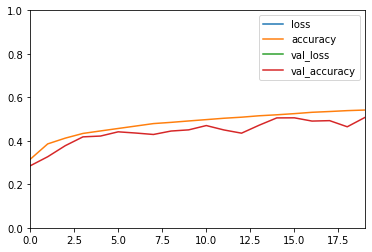

In [ ]:
pd.DataFrame(history.history).plot()
plt.axis([0, 19, 0, 1])
plt.show()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                196672    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 205,642
Trainable params: 205,642
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]),
    keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"),
    keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=0.01),
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
1407/1407 [==============================] - 235s 167ms/step - loss: 2.1427 - accuracy: 0.2066 - val_loss: 1.9197 - val_accuracy: 0.2894
Epoch 2/20
1407/1407 [==============================] - 239s 170ms/step - loss: 1.6795 - accuracy: 0.4044 - val_loss: 1.8565 - val_accuracy: 0.3654
Epoch 3/20
1407/1407 [==============================] - 238s 169ms/step - loss: 1.4303 - accuracy: 0.4919 - val_loss: 1.3436 - val_accuracy: 0.5214
Epoch 4/20
1407/1407 [==============================] - 238s 169ms/step - loss: 1.2879 - accuracy: 0.5384 - val_loss: 1.2915 - val_accuracy: 0.5384
Epoch 5/20
1407/1407 [==============================] - 239s 170ms/step - loss: 1.1774 - accuracy: 0.5825 - val_loss: 1.1538 - val_accuracy: 0.5992
Epoch 6/20
1407/1407 [==============================] - 240s 171ms/step - loss: 1.0753 - accuracy: 0.6198 - val_loss: 1.1624 - val_accuracy: 0.5900
Epoch 7/20
1407/1407 [==============================] - 241s 171ms/step - loss: 0.9853 - accuracy: 0.6536 - val_

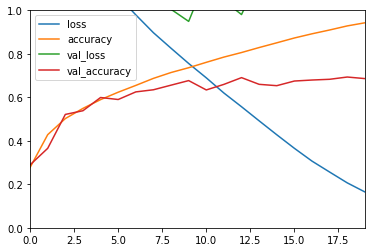

In [ ]:
pd.DataFrame(history.history).plot()
plt.axis([0, 19, 0, 1])
plt.show()

In [ ]:
# Number of params in a convolutional layer =
# (kernel_width * kernel_height * channels_in + 1 for bias) * channels_out
(
    (3 * 3 * 3 + 1)  * 32  # in: 32x32x3   out: 32x32x32  Conv2D
  + (3 * 3 * 32 + 1) * 32  # in: 32x32x32  out: 32x32x32  Conv2D
  + 0                      # in: 32x32x32  out: 16x16x32  MaxPool2D
  + (3 * 3 * 32 + 1) * 64  # in: 16x16x32  out: 16x16x64  Conv2D
  + (3 * 3 * 64 + 1) * 64  # in: 16x16x64  out: 16x16x64  Conv2D
  + 0                      # in: 16x16x64  out: 8x8x64    MaxPool2D
  + 0                      # in: 8x8x64    out: 4096      Flatten
  + (4096 + 1) * 128       # in: 4096      out: 128       Dense
  + (128 + 1) * 10         # in: 128       out: 10        Dense
)

591274

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)             

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=0.01),
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
1407/1407 [==============================] - 270s 192ms/step - loss: 1.5960 - accuracy: 0.4401 - val_loss: 1.1840 - val_accuracy: 0.5762
Epoch 2/20
1407/1407 [==============================] - 277s 197ms/step - loss: 0.9863 - accuracy: 0.6534 - val_loss: 0.9954 - val_accuracy: 0.6472
Epoch 3/20
1407/1407 [==============================] - 277s 197ms/step - loss: 0.7810 - accuracy: 0.7237 - val_loss: 0.9303 - val_accuracy: 0.6800
Epoch 4/20
1407/1407 [==============================] - 277s 197ms/step - loss: 0.6292 - accuracy: 0.7782 - val_loss: 0.8421 - val_accuracy: 0.7108
Epoch 5/20
1407/1407 [==============================] - 276s 196ms/step - loss: 0.5287 - accuracy: 0.8173 - val_loss: 0.8942 - val_accuracy: 0.7044
Epoch 6/20
1407/1407 [==============================] - 277s 197ms/step - loss: 0.4294 - accuracy: 0.8527 - val_loss: 0.8972 - val_accuracy: 0.7124
Epoch 7/20
1407/1407 [==============================] - 278s 198ms/step - loss: 0.3389 - accuracy: 0.8856 - val_

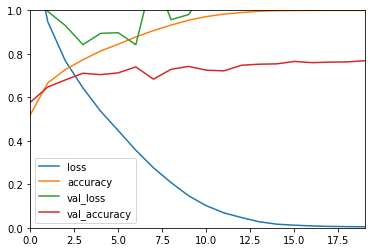

In [ ]:
pd.DataFrame(history.history).plot()
plt.axis([0, 19, 0, 1])
plt.show()

## Part 2

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]),
    keras.layers.BatchNormalization(),
    keras.layers.SeparableConv2D(filters=32, kernel_size=3, padding="same", activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.SeparableConv2D(filters=64, kernel_size=3, padding="same", activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.SeparableConv2D(filters=64, kernel_size=3, padding="same", activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=0.01),
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
1407/1407 [==============================] - 174s 123ms/step - loss: 1.6492 - accuracy: 0.4207 - val_loss: 1.2897 - val_accuracy: 0.5402
Epoch 2/20
1407/1407 [==============================] - 173s 123ms/step - loss: 1.0305 - accuracy: 0.6326 - val_loss: 1.0849 - val_accuracy: 0.6184
Epoch 3/20
1407/1407 [==============================] - 172s 122ms/step - loss: 0.8480 - accuracy: 0.6983 - val_loss: 1.0054 - val_accuracy: 0.6578
Epoch 4/20
1407/1407 [==============================] - 174s 124ms/step - loss: 0.7138 - accuracy: 0.7451 - val_loss: 0.8624 - val_accuracy: 0.7008
Epoch 5/20
1407/1407 [==============================] - 172s 122ms/step - loss: 0.6199 - accuracy: 0.7805 - val_loss: 0.8570 - val_accuracy: 0.7068
Epoch 6/20
1407/1407 [==============================] - 172s 122ms/step - loss: 0.5387 - accuracy: 0.8143 - val_loss: 0.9001 - val_accuracy: 0.6984
Epoch 7/20
1407/1407 [==============================] - 171s 121ms/step - loss: 0.4566 - accuracy: 0.8427 - val_

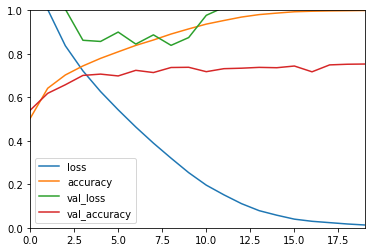

In [ ]:
pd.DataFrame(history.history).plot()
plt.axis([0, 19, 0, 1])
plt.show()

In [ ]:
# Number of params in a depthwise separable 2D convolution layer =
# kernel_width * kernel_height * channels_in + (channels_in + 1 for bias) * channels_out
(
    (3 * 3 * 3 + 1) * 32        # in: 32x32x3   out: 32x32x32  Conv2D
  + 32 * 2                      # in: 32x32x32  out: 32x32x32  BN
  + 3 * 3 * 32 + (32 + 1) * 32  # in: 32x32x32  out: 32x32x32  SeparableConv2D
  + 32 * 2                      # in: 32x32x32  out: 32x32x32  BN
  + 0                           # in: 32x32x32  out: 16x16x32  MaxPool2D
  + 3 * 3 * 32 + (32 + 1) * 64  # in: 16x16x32  out: 16x16x64  SeparableConv2D
  + 64 * 2                      # in: 16x16x64  out: 16x16x64  BN
  + 3 * 3 * 64 + (64 + 1) * 64  # in: 16x16x64  out: 16x16x64  SeparableConv2D
  + 64 * 2                      # in: 16x16x64  out: 16x16x64  BN
  + 0                           # in: 16x16x64  out: 8x8x64    MaxPool2D
  + 0                           # in: 8x8x64    out: 4096      Flatten
  + (4096 + 1) * 128            # in: 4096      out: 128       Dense
  + (128 + 1) * 10              # in: 128       out: 10        Dense
)

535466

In [ ]:
 model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_4 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
separable_conv2d (SeparableC (None, 32, 32, 32)        1344      
_________________________________________________________________
batch_normalization_5 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
separable_conv2d_1 (Separabl (None, 16, 16, 64)        2400      
_________________________________________________________________
batch_normalization_6 (Batch (None, 16, 16, 64)       

##Part 3 - Pretrained Convolutional Networks

In [ ]:
img_fig_path = os.path.join("/content", "dog.jpg")
img_fig = keras.preprocessing.image.load_img(img_fig_path, target_size=(299, 299))
img_fig = keras.preprocessing.image.img_to_array(img_fig)

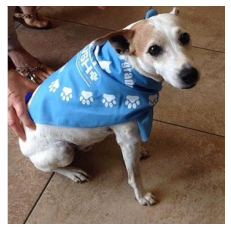

(299, 299, 3)

In [ ]:
plt.imshow(img_fig / 255)
plt.axis("off")
plt.show()
img_fig.shape

In [ ]:
img_ostrich_path = os.path.join("/content", "ostrich.jpg")
img_ostrich = keras.preprocessing.image.load_img(img_ostrich_path, target_size=(299, 299))
img_ostrich = keras.preprocessing.image.img_to_array(img_ostrich)

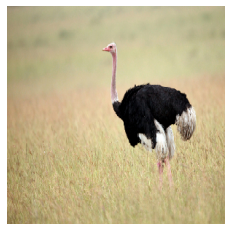

(299, 299, 3)

In [ ]:
plt.imshow(img_ostrich / 255)
plt.axis("off")
plt.show()
img_ostrich.shape

In [ ]:
X_batch = np.array([img_fig, img_ostrich])
X_preproc = keras.applications.xception.preprocess_input(X_batch)

In [ ]:
X_preproc.min(), X_preproc.max()

(-1.0, 1.0)

In [ ]:
model = keras.applications.xception.Xception()
Y_proba = model.predict(X_preproc)

91889664/91884032 [==============================] - 1s 0us/step


In [ ]:
Y_proba.shape

(2, 1000)

In [ ]:
np.argmax(Y_proba, axis=1)

array([171,   9])

In [ ]:
decoded_predictions = keras.applications.resnet50.decode_predictions(Y_proba)
for preds in decoded_predictions:
    for wordnet_id, name, proba in preds:
        print("{} ({}): {:.1f}%".format(name, wordnet_id, 100 * proba))
    print()

40960/35363 [==================================] - 0s 0us/step
Italian_greyhound (n02091032): 38.9%
whippet (n02091134): 19.1%
Chihuahua (n02085620): 11.4%
toy_terrier (n02087046): 5.1%
beagle (n02088364): 1.1%

ostrich (n01518878): 92.1%
bustard (n02018795): 0.2%
crane (n02012849): 0.1%
black_swan (n01860187): 0.1%
white_stork (n02002556): 0.1%



## Part 4 – Data Augmentation and Transfer Learning
In this part you will reuse a pretrained Xception model to build a flower classifier.

In [ ]:
import tensorflow as tf
from tensorflow import keras
import os

flowers_url = "http://download.tensorflow.org/example_images/flower_photos.tgz"
flowers_path = keras.utils.get_file("flowers.tgz", flowers_url, extract=True)
flowers_dir = os.path.join(os.path.dirname(flowers_path), "flower_photos")

228818944/228813984 [==============================] - 2s 0us/step


In [ ]:
for root, subdirs, files in os.walk(flowers_dir):
    print(root)
    for filename in files[:3]:
        print("   ", filename)
    if len(files) > 3:
        print("    ...")

/root/.keras/datasets/flower_photos
    LICENSE.txt
/root/.keras/datasets/flower_photos/roses
    6676529655_9672b6f955_m.jpg
    1949195327_75f76c12b1.jpg
    3292434691_392071d702_n.jpg
    ...
/root/.keras/datasets/flower_photos/dandelion
    4632251871_9f324a7bb5.jpg
    3465599902_14729e2b1b_n.jpg
    17077940105_d2cd7b9ec4_n.jpg
    ...
/root/.keras/datasets/flower_photos/tulips
    14027372499_30f934d24f_m.jpg
    17469578564_35a8360f58.jpg
    17907238905_1ae121f8d9_m.jpg
    ...
/root/.keras/datasets/flower_photos/sunflowers
    6606817351_10f6e43a09.jpg
    21374127408_5ffbe87bb2.jpg
    3832945398_96509d192b.jpg
    ...
/root/.keras/datasets/flower_photos/daisy
    2612704455_efce1c2144_m.jpg
    4697206799_19dd2a3193_m.jpg
    9299302012_958c70564c_n.jpg
    ...


In [ ]:
datagen = keras.preprocessing.image.ImageDataGenerator(
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1,
    preprocessing_function=keras.applications.xception.preprocess_input)

train_generator = datagen.flow_from_directory(
        flowers_dir,
        target_size=(299, 299),
        batch_size=32,
        subset="training")

valid_generator = datagen.flow_from_directory(
        flowers_dir,
        target_size=(299, 299),
        batch_size=32,
        subset="validation")

Found 3306 images belonging to 5 classes.
Found 364 images belonging to 5 classes.


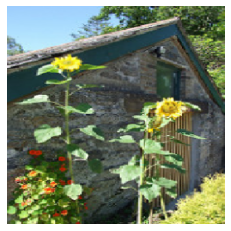

In [ ]:
X_batch, y_batch = next(valid_generator)
plt.imshow((X_batch[0] + 1)/2)
plt.axis("off")
plt.show()

In [ ]:
n_classes = 5

base_model = keras.applications.xception.Xception(include_top=False)

for layer in base_model.layers:
    layer.trainable = False

global_pool = keras.layers.GlobalAveragePooling2D()(base_model.output)
predictions = keras.layers.Dense(n_classes, activation='softmax')(global_pool)

model = keras.models.Model(base_model.input, predictions)

model.compile(loss="categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

83689472/83683744 [==============================] - 1s 0us/step


In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=50// 4,
    epochs=20,
    validation_data=valid_generator,
    validation_steps=25// 4)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
12/12 [==============================] - 230s 20s/step - loss: 1.6100 - accuracy: 0.1953 - val_loss: 1.5940 - val_accuracy: 0.2448
Epoch 2/20
12/12 [==============================] - 225s 19s/step - loss: 1.5734 - accuracy: 0.2656 - val_loss: 1.5676 - val_accuracy: 0.2500
Epoch 3/20
12/12 [==============================] - 224s 19s/step - loss: 1.5370 - accuracy: 0.3229 - val_loss: 1.5285 - val_accuracy: 0.3177
Epoch 4/20
12/12 [==============================] - 224s 19s/step - loss: 1.5356 - accuracy: 0.3385 - val_loss: 1.5280 - val_accuracy: 0.3542
Epoch 5/20
12/12 [==============================] - 223s 19s/step - loss: 1.5263 - accuracy: 0.3542 - val_loss: 1.5158 - val_accuracy: 0.3177
Epoch 6/20
12/12 [==============================] - 224s 19s/step - loss: 1.4902 - accuracy: 0.4062 - val_loss: 1.4833 - val_accuracy: 0.4271
Epoch 7/20
12/12 [==============================] - 223s 19s/step - loss: 1.4874 - accuracy: 0.3854 - val_loss: 1.4580 - val_accuracy: 0.4323
Epoch 

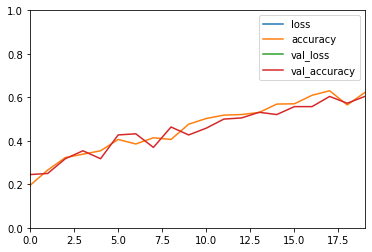

In [ ]:
pd.DataFrame(history.history).plot()
plt.axis([0, 19, 0, 1])
plt.show()

## The End



